In [27]:
import numpy as np
import scipy as sp
from pandas import DataFrame,Series
import pandas as pd

import seaborn as sns
%matplotlib inline

In [28]:
train_ = pd.read_csv('./train.csv')
test_ = pd.read_csv('./test.csv')

In [29]:
#欠損値データ
train_.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
#delete any rows which no needs
train_df = train_.drop(['Name','Ticket','Fare','Cabin','Parch','SibSp','PassengerId'],axis=1)

In [31]:
#NaN行を削除
train_df = train_df.dropna()

In [32]:
#Ageの欠損を埋める
train_df = train_df.fillna(train_df.median())

In [33]:
train_df['gender'] = train_df['Sex'].map({'female':0,'male':1}).astype(int)
train_df['embarked'] = train_df['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [34]:
train_df = train_df.drop(['Embarked','Sex'],axis=1)

In [35]:
#テストデータの欠損値を調べる
test_.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
ids = test_['PassengerId'].values
test_df = test_.drop(['PassengerId','Name','Ticket','Fare','Cabin','Parch','SibSp'],axis=1)

In [37]:
test_df['gender'] = test_df['Sex'].map({'female':0,'male':1}).astype(int)
test_df['embarked'] = test_df['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [38]:
test_df = test_df.fillna(test_df.median())

In [39]:
test_df = test_df.drop(['Embarked','Sex'],axis=1)

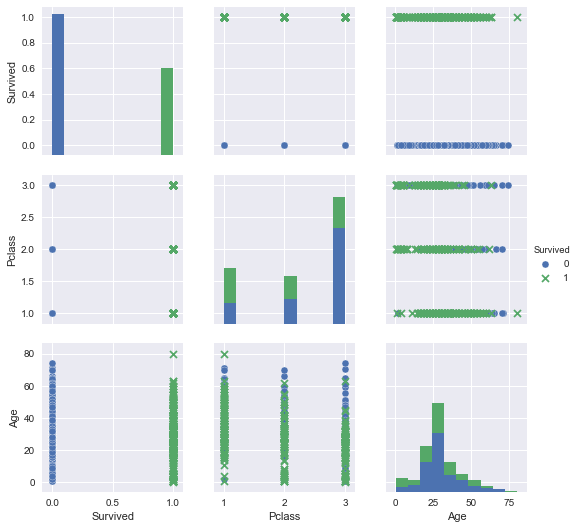

In [59]:
sns.pairplot(train_df,hue='Survived',markers=['o','x'])

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import csv as csv

In [74]:
#Data Split
X = train_df
Y = test_df
model = LogisticRegression()
X_all = train_df.drop('Survived',axis=1)
y_all = train_df['Survived']

In [76]:
#Splitting up the Training Data
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=0.2,random_state=50)

In [77]:
#X.drop('Survived',axis=1)=X.value[0::,1::] X['Survived'] = X.value[0::,0]
output = model.fit(X_train,y_train)

In [79]:
print('train_result:',output.score(X_train,y_train))
print('test_result:',output.score(X_test,y_test))

train_result: 0.79086115993
test_result: 0.811188811189


In [81]:
#predict the Actual test Data
predicstions = model.predict(test_df)

output = pd.DataFrame({'PassengerId' : ids,'Survived': predicstions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [82]:
#make csv
submit_file = open('titanic_submit.csv','w')
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId","Survived"])
file_object.writerows(zip(ids,predicstions))
submit_file.close()